In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [127]:
df=pd.read_csv("car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [128]:
df.shape

(19237, 18)

In [129]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [130]:
#removing the unwanted columns 
df.drop(columns=['ID','Levy','Wheel', 'Color'],inplace=True)


In [131]:
df.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,4


In [132]:
df.shape

(19237, 14)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  object 
 8   Mileage           19237 non-null  object 
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  object 
 13  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.1+ MB


In [134]:
#rename the possible columns 
df.rename(columns={ 'Prod. year' : 'Prod_year', 'Leather interior':'Leather_interior','Fuel type':'Fuel_type','Engine volume':'Engine_volume','Gear box type':'Gear_box_type','Drive wheels':'Drive_wheels'},inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod_year         19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather_interior  19237 non-null  object 
 6   Fuel_type         19237 non-null  object 
 7   Engine_volume     19237 non-null  object 
 8   Mileage           19237 non-null  object 
 9   Cylinders         19237 non-null  float64
 10  Gear_box_type     19237 non-null  object 
 11  Drive_wheels      19237 non-null  object 
 12  Doors             19237 non-null  object 
 13  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.1+ MB


In [136]:
continuous = ['Price','Engine_volume','Mileage']
discreate_catagorical = ['Manufacturer','Model','Category','Leather_interior','Fuel_type','Gear_box_type','Drive_wheels']
discrate_count = ['Cylinders','Doors']

In [137]:
df.Price.unique

<bound method Series.unique of 0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 19237, dtype: int64>

In [138]:
df.Price.value_counts()

Price
15681    280
470      274
14113    244
392      242
314      235
        ... 
42601      1
149        1
54349      1
54954      1
22075      1
Name: count, Length: 2315, dtype: int64

In [139]:
# Remove non-numeric characters and convert to numeric (if valid)
df['Engine_volume'] = df['Engine_volume'].replace(r'[^0-9.]+', '', regex=True).astype(float)

In [140]:
df.Engine_volume.unique()


array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [141]:
df['Mileage'] = df['Mileage'].replace(r'[^\d.]', '', regex=True).astype(float)

In [142]:
df.Mileage.unique()

array([186005., 192000., 200000., ..., 140607., 307325., 186923.])

In [143]:
df.Mileage.value_counts()

Mileage
0.0         721
200000.0    183
150000.0    161
160000.0    120
100000.0    119
           ... 
63083.0       1
28750.0       1
25077.0       1
77452.0       1
186923.0      1
Name: count, Length: 7687, dtype: int64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod_year         19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather_interior  19237 non-null  object 
 6   Fuel_type         19237 non-null  object 
 7   Engine_volume     19237 non-null  float64
 8   Mileage           19237 non-null  float64
 9   Cylinders         19237 non-null  float64
 10  Gear_box_type     19237 non-null  object 
 11  Drive_wheels      19237 non-null  object 
 12  Doors             19237 non-null  object 
 13  Airbags           19237 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 2.1+ MB


In [145]:
df.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [146]:
df.Model.unique

<bound method Series.unique of 0         RX 450
1        Equinox
2            FIT
3         Escape
4            FIT
          ...   
19232    CLK 200
19233     Sonata
19234     Tucson
19235    Captiva
19236     Sonata
Name: Model, Length: 19237, dtype: object>

In [147]:
df.Category.unique()


array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [148]:
df.Category.value_counts()

Category
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: count, dtype: int64

In [149]:
df.Gear_box_type.unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [150]:
df.Gear_box_type.value_counts()


Gear_box_type
Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: count, dtype: int64

In [151]:
df.Drive_wheels.unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [152]:
df.Drive_wheels.value_counts()

Drive_wheels
Front    12874
4x4       4058
Rear      2305
Name: count, dtype: int64

In [153]:
# Step 1: Handle outliers in Price
price_upper_limit = 100000  # cap price at a maximum reasonable value
df['Price'] = df['Price'].apply(lambda x: min(x, price_upper_limit))

# Step 2: Handle Engine volume outliers and zero values
df['Engine_volume'] = df['Engine_volume'].replace(0, np.nan)  # replace 0 with NaN
df['Engine_volume'] = df['Engine_volume'].fillna(df['Engine_volume'].median())  # replace NaNs with median

# Step 3: Handle Mileage outliers and zero values
mileage_upper_limit = 1000000  # cap mileage at a reasonable upper limit (e.g., 1 million km)
df['Mileage'] = df['Mileage'].apply(lambda x: min(x, mileage_upper_limit))  # cap mileage at max

# Optionally, handle zero values in Mileage (replace with NaN if needed)
df['Mileage'] = df['Mileage'].replace(0, np.nan)  # replace 0 with NaN
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())  # replace NaNs with median

# Display cleaned data
print(df)


       Price   Manufacturer    Model  Prod_year   Category Leather_interior  \
0      13328          LEXUS   RX 450       2010       Jeep              Yes   
1      16621      CHEVROLET  Equinox       2011       Jeep               No   
2       8467          HONDA      FIT       2006  Hatchback               No   
3       3607           FORD   Escape       2011       Jeep              Yes   
4      11726          HONDA      FIT       2014  Hatchback              Yes   
...      ...            ...      ...        ...        ...              ...   
19232   8467  MERCEDES-BENZ  CLK 200       1999      Coupe              Yes   
19233  15681        HYUNDAI   Sonata       2011      Sedan              Yes   
19234  26108        HYUNDAI   Tucson       2010       Jeep              Yes   
19235   5331      CHEVROLET  Captiva       2007       Jeep              Yes   
19236    470        HYUNDAI   Sonata       2012      Sedan              Yes   

      Fuel_type  Engine_volume   Mileage  Cylinders

In [154]:
df[continuous].describe()

,Price,Engine_volume,Mileage
count,19237.000000,19237.000000,19237.000000
mean,16911.402714,2.309029,148173.624994
std,16717.969825,0.876253,112279.162186
min,1.000000,0.100000,13.000000
25%,5331.000000,1.800000,79080.000000
50%,13172.000000,2.000000,130000.000000
75%,22075.000000,2.500000,188888.000000
max,100000.000000,20.000000,1000000.000000


C:\Users\dasar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dasar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dasar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mileage', ylabel='Count'>

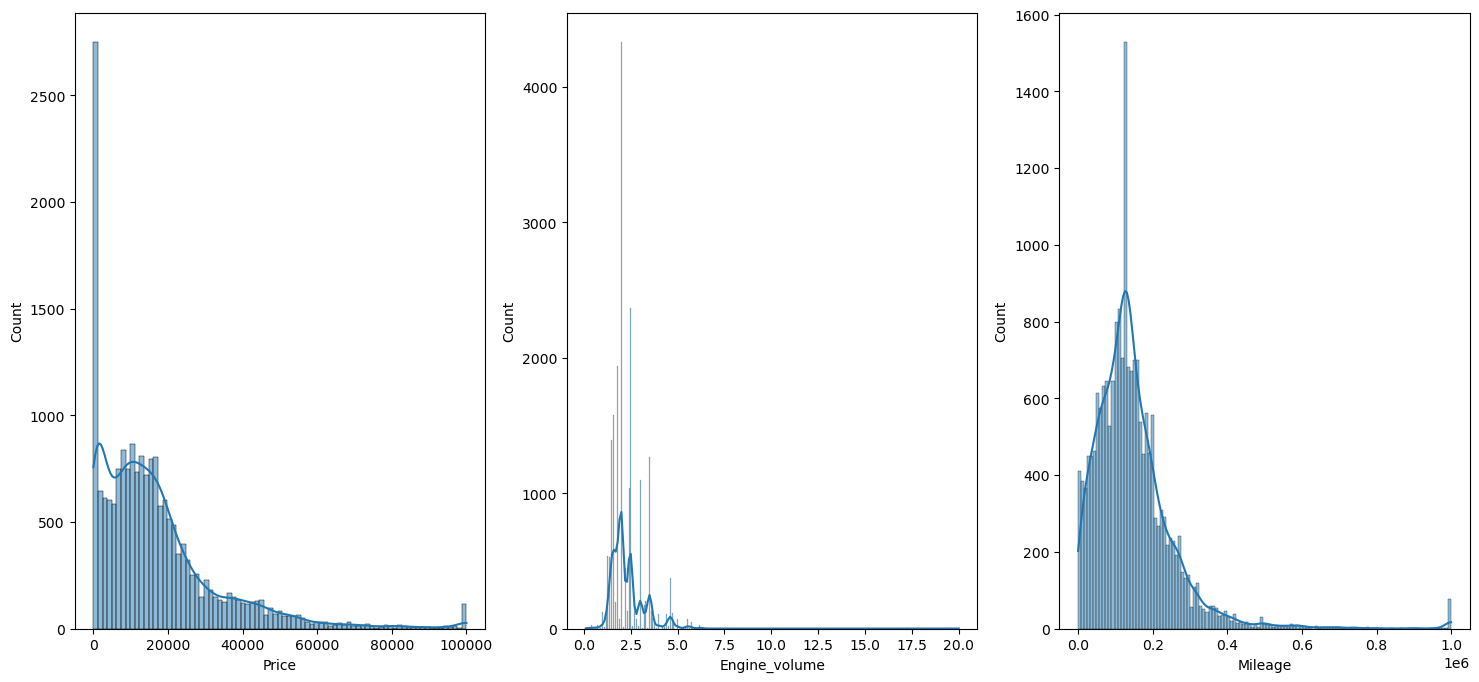

In [155]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,3,1)
sns.histplot(df['Price'],kde=True)
plt.subplot(1,3,2)
sns.histplot(df['Engine_volume'],kde=True)
plt.subplot(1,3,3)
sns.histplot(df['Mileage'],kde=True)

In [156]:
df[continuous].skew()

Price            1.977763
Engine_volume    2.203791
Mileage          2.918416
dtype: float64

C:\Users\dasar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dasar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dasar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


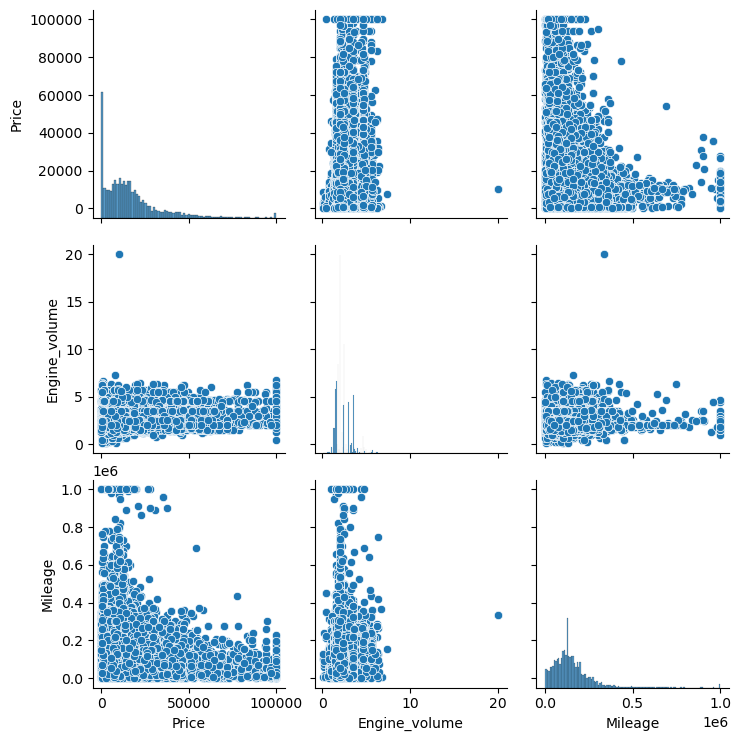

In [157]:
sns.pairplot(df[continuous])
plt.show()

<Axes: >

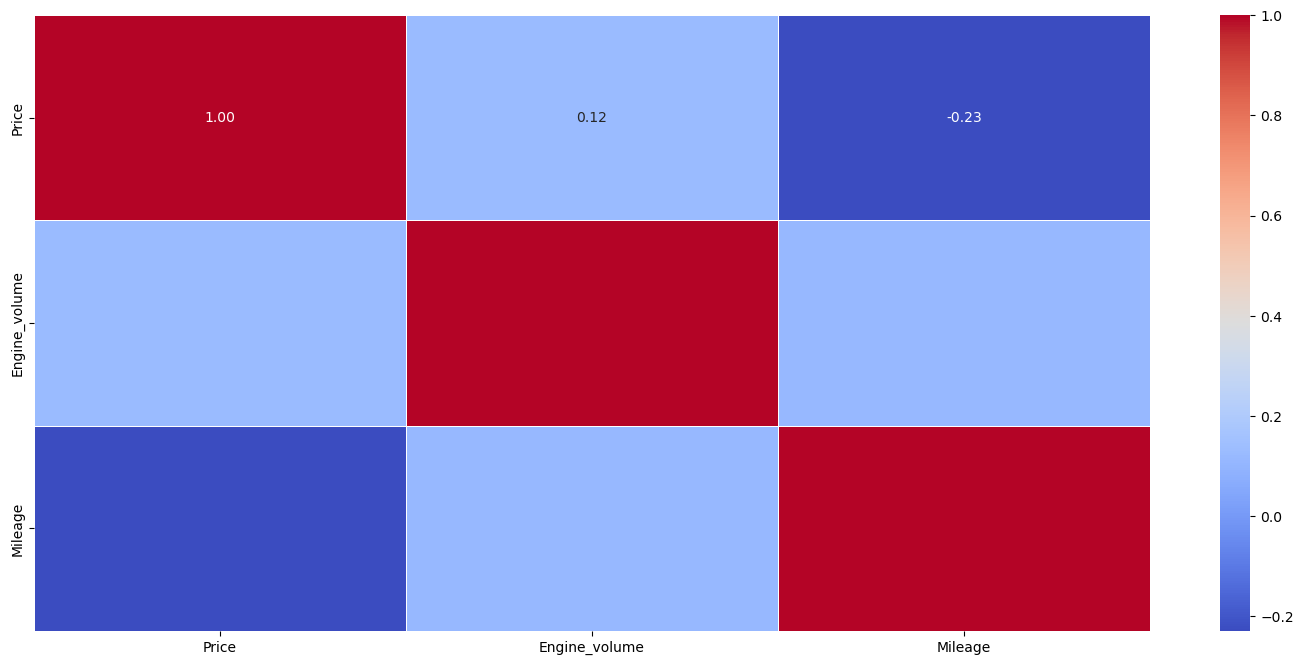

In [158]:
sns.heatmap(df[continuous].corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

In [159]:
df[continuous].corr()

,Price,Engine_volume,Mileage
Price,1.000000,0.123813,-0.229329
Engine_volume,0.123813,1.000000,0.112463
Mileage,-0.229329,0.112463,1.000000


<Axes: >

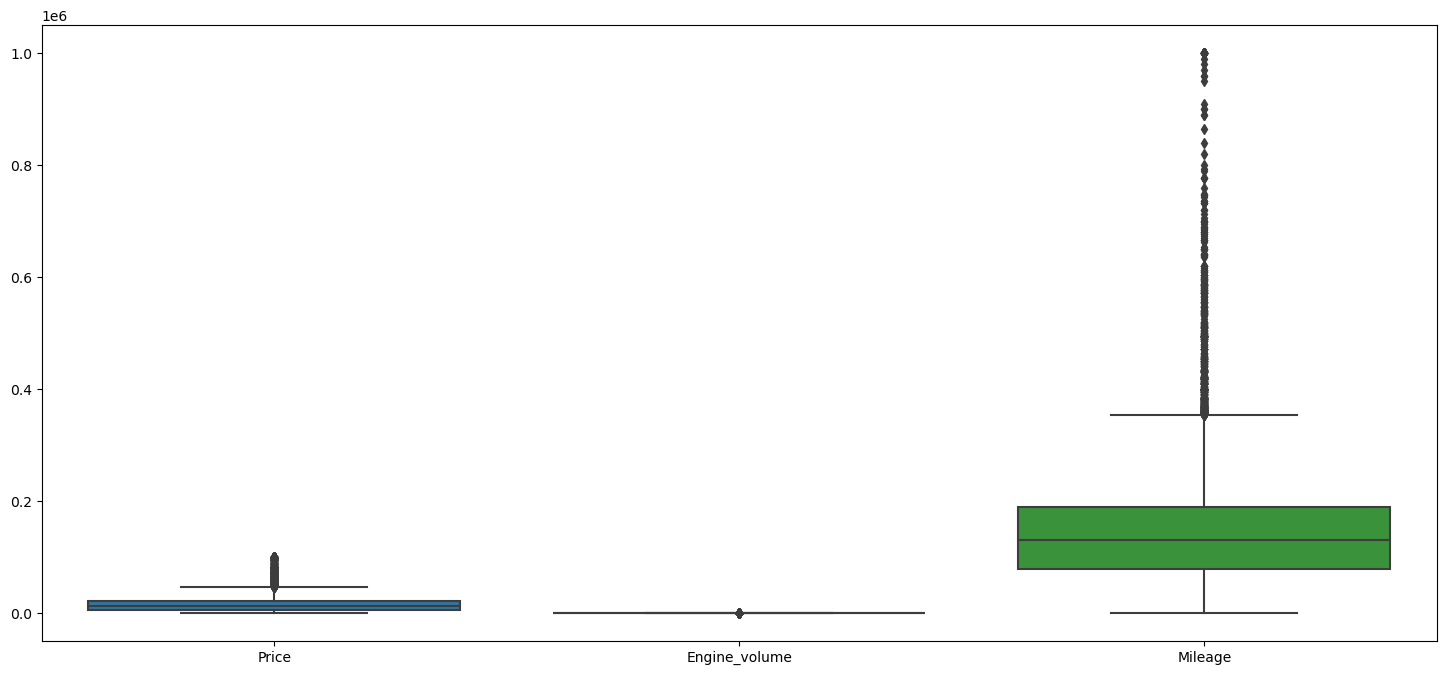

In [160]:
sns.boxplot(df[continuous])

In [161]:
df[discreate_catagorical].describe()

,Manufacturer,Model,Category,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels
count,19237,19237,19237,19237,19237,19237,19237
unique,65,1590,11,2,7,4,3
top,HYUNDAI,Prius,Sedan,Yes,Petrol,Automatic,Front
freq,3769,1083,8736,13954,10150,13514,12874


In [162]:
 #data pre-processing

In [163]:
#finding missing values
df.isnull().sum()

Price               0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Airbags             0
dtype: int64

In [164]:
#checking duplicates
df.duplicated().sum()

3522

In [165]:
df=df.drop_duplicates(inplace=False)


In [166]:
df.duplicated().sum()

0

In [167]:
df.head()


,Price,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,4


In [168]:
df.Gear_box_type.value_counts()

Gear_box_type
Automatic    10079
Tiptronic     3064
Manual        1841
Variator       731
Name: count, dtype: int64

In [169]:
df['Leather_interior'] = df['Leather_interior'].fillna('No')
df['Gear_box_type'] = df['Gear_box_type'].fillna('Manual')


In [170]:
df['Leather_interior']=df['Leather_interior'].map({'Yes':1,'No':0}).astype(int)



In [171]:
#Handle missing and infinite values
df['Gear_box_type'].fillna('Other', inplace=True)  # Fill NaN with 'Other'
df['Gear_box_type'].replace([float('inf'), -float('inf')], 'Other', inplace=True)  # Replace inf with 'Other'

# Map the categories to integers
df['Gear_box_type'] = df['Gear_box_type'].map({
    'Automatic': 0,
    'Tiptronic': 1,
    'Manual': 2,
    'Variator': 3,
    'Other': 4  # Map 'Other' to an integer
}).astype(int)


In [172]:
df.drop(columns=['Doors'], inplace=True)



In [173]:
df['Fuel_type']=df['Fuel_type'].map({'Petrol':0,'Diesel':1,'Hybrid':2,'LPG':3,'CNG':4,'Plug-in Hybrid':5,'Hydrogen':6})


In [174]:
df['Drive_wheels']=df['Drive_wheels'].map({'Front':0,'4x4':1,'Rear':2})

In [175]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

label_encoder = LabelEncoder()
df['Manufacturer'] = label_encoder.fit_transform(df['Manufacturer'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Category'] = label_encoder.fit_transform(df['Category'])



In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15715 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15715 non-null  int64  
 1   Manufacturer      15715 non-null  int32  
 2   Model             15715 non-null  int32  
 3   Prod_year         15715 non-null  int64  
 4   Category          15715 non-null  int32  
 5   Leather_interior  15715 non-null  int32  
 6   Fuel_type         15715 non-null  int64  
 7   Engine_volume     15715 non-null  float64
 8   Mileage           15715 non-null  float64
 9   Cylinders         15715 non-null  float64
 10  Gear_box_type     15715 non-null  int32  
 11  Drive_wheels      15715 non-null  int64  
 12  Airbags           15715 non-null  int64  
dtypes: float64(3), int32(5), int64(5)
memory usage: 1.4 MB


In [177]:
df[continuous]


,Price,Engine_volume,Mileage
0,13328,3.5,186005.0
1,16621,3.0,192000.0
2,8467,1.3,200000.0
3,3607,2.5,168966.0
4,11726,1.3,91901.0
...,...,...,...
19230,470,1.8,307325.0
19232,8467,2.0,300000.0
19233,15681,2.4,161600.0
19234,26108,2.0,116365.0


In [178]:
df['Price'],a=boxcox(df['Price'])
df['Engine_volume'],b=boxcox(df['Engine_volume'])
df['Mileage'],b=boxcox(df['Mileage'])


In [179]:
df[continuous].skew()

Price           -0.041519
Engine_volume   -0.004143
Mileage          0.146931
dtype: float64

In [180]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Price"]) 
y = df["Price"]  

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression RMSE: {rmse_lr}")


Linear Regression RMSE: 32.8109112764213


In [182]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest RMSE: 23.197915938551677


In [184]:
!pip install xgboost
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")


XGBoost RMSE: 23.011937261258456


In [185]:
print(f"""
Model Comparison:
Linear Regression RMSE: {rmse_lr}
Random Forest RMSE: {rmse_rf}
XGBoost RMSE: {rmse_xgb}
""")



Model Comparison:
Linear Regression RMSE: 32.8109112764213
Random Forest RMSE: 23.197915938551677
XGBoost RMSE: 23.011937261258456



In [ ]:
import joblib
joblib.dump(best_rf_model, "best_car_price_model.pkl")
loaded_model = joblib.load("best_car_price_model.pkl")


In [ ]:
df.to_csv('car_price_over.csv', index=False)